# COVID-19 World Vaccination Progress Analysis

## Context
Data is collected daily from *Our World in Data* GitHub repository for covid-19, merged and uploaded.

## Content
The data contains the following information:

**Country**- this is the country for which the vaccination information is provided;<br/>
**Country ISO Code** - ISO code for the country;<br/>
**Date** - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;<br/>
**Total number of vaccinations** - this is the absolute number of total immunizations in the country;<br/>
**Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;<br/>
**Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;<br/>
**Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;<br/>
**Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;<br/>
**Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;<br/>
**Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;<br/>
**Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;<br/>
**Number of vaccinations per day** - number of daily vaccination for that day and country;<br/>
**Daily vaccinations per million** - ratio (in ppm) between vaccination number and total population for the current date in the country;<br/>
**Vaccines used in the country** - total number of vaccines used in the country (up to date);<br/>
**Source name** - source of the information (national authority, international organization, local organization etc.);<br/>
**Source website** - website of the source of information;

# Analysis

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
data = pd.read_csv('Datasets\country_vaccinations.csv')

In [41]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1267 non-null   object 
 1   iso_code                             1118 non-null   object 
 2   date                                 1267 non-null   object 
 3   total_vaccinations                   825 non-null    float64
 4   people_vaccinated                    794 non-null    float64
 5   people_fully_vaccinated              167 non-null    float64
 6   daily_vaccinations_raw               655 non-null    float64
 7   daily_vaccinations                   1210 non-null   float64
 8   total_vaccinations_per_hundred       825 non-null    float64
 9   people_vaccinated_per_hundred        794 non-null    float64
 10  people_fully_vaccinated_per_hundred  167 non-null    float64
 11  daily_vaccinations_per_million

In [43]:
data.isnull().sum()

country                                   0
iso_code                                149
date                                      0
total_vaccinations                      442
people_vaccinated                       473
people_fully_vaccinated                1100
daily_vaccinations_raw                  612
daily_vaccinations                       57
total_vaccinations_per_hundred          442
people_vaccinated_per_hundred           473
people_fully_vaccinated_per_hundred    1100
daily_vaccinations_per_million           57
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [44]:
dates = data.date.unique()
dates.sort()

In [45]:
data[data.country == 'Bahrain']['vaccines'][data.date == '2021-01-20'].sum()

'Pfizer/BioNTech, Sinopharm'

In [46]:
countries = data.country.unique()
vaccine_countries = []
total_vaccination = []
vaccine_name = []
daily_vaccination = []
people_vaccinated_per_hundred = []
iso_codes = []
latest_data_update = []

In [47]:
# Seperate all the latest record in their respective lists
for i in countries:
    for d in dates[::-1]:
        total = data[data.country == i]['total_vaccinations'][data.date == d].sum()
        name = data[data.country == i]['vaccines'][data.date == d].sum()
        daily = data[data.country == i]['daily_vaccinations'][data.date == d].sum()
        per_hundred = data[data.country == i]['people_vaccinated_per_hundred'][data.date == d].sum()
        iso = data[data.country == i]['iso_code'][data.date == d].sum()
        
        # if one of those features are null
        if(total == 0 or name == 0 or daily == 0 or per_hundred == 0 or iso == 0):
            pass
        else:
            vaccine_countries.append(i)
            total_vaccination.append(total)
            vaccine_name.append(name)
            daily_vaccination.append(daily)
            people_vaccinated_per_hundred.append(per_hundred)
            iso_codes.append(iso)
            latest_data_update.append(d)
            break

In [48]:
print(len(total_vaccination))

51


In [49]:
# create a new data frame with the latets data
recent_data = pd.DataFrame({
    'Country' : vaccine_countries,
    'Total Vaccinations': total_vaccination, 
    'Daily Vaccinations': daily_vaccination,
    'Vaccine': vaccine_name, 
    'Percentage of Population (%)': people_vaccinated_per_hundred,  
    'Last Updated': latest_data_update
})
recent_data.style.background_gradient(cmap='Greens', subset=['Percentage of Population (%)', 'Total Vaccinations'])

,Country,Total Vaccinations,Daily Vaccinations,Vaccine,Percentage of Population (%),Last Updated
0,Argentina,265724.000000,11704.000000,Sputnik V,0.550000,2021-01-21
1,Austria,166956.000000,11797.000000,Pfizer/BioNTech,1.850000,2021-01-22
2,Bahrain,144130.000000,6110.000000,"Pfizer/BioNTech, Sinopharm",8.470000,2021-01-20
3,Belgium,141758.000000,11419.000000,Pfizer/BioNTech,1.220000,2021-01-20
4,Brazil,193699.000000,32283.000000,Sinovac,0.090000,2021-01-22
5,Bulgaria,25251.000000,1081.000000,"Moderna, Pfizer/BioNTech",0.300000,2021-01-21
6,Canada,738864.000000,39910.000000,"Moderna, Pfizer/BioNTech",1.960000,2021-01-21
7,Chile,62822.000000,6328.000000,Pfizer/BioNTech,0.280000,2021-01-21
8,China,15000000.000000,714286.000000,"CNBG, Sinovac",1.040000,2021-01-20
9,Costa Rica,24859.000000,2158.000000,Pfizer/BioNTech,0.490000,2021-01-15


# Visualizing the data

In [106]:
def plot_barh(x, y, title, x_title):
    plt.figure(figsize=(18,24))
    plt.barh(x, y)
    plt.title(title, size=30)
    plt.xlabel(x_title, size=10)
    plt.show()
def plot_simple(x, y, title, x_title, y_title):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    ax.plot(x,y)
def plot_bar(x, y, title, x_title, y_title):
    fig, ax = plt.subplots(figsize=(30,16))
    plt.xlabel(x_title, size=20)
    plt.ylabel(y_title, size=20)
    plt.xticks(size=12)
    plt.yticks(size=18)
    plt.title(title, size=30)
    ax.bar(x,y)

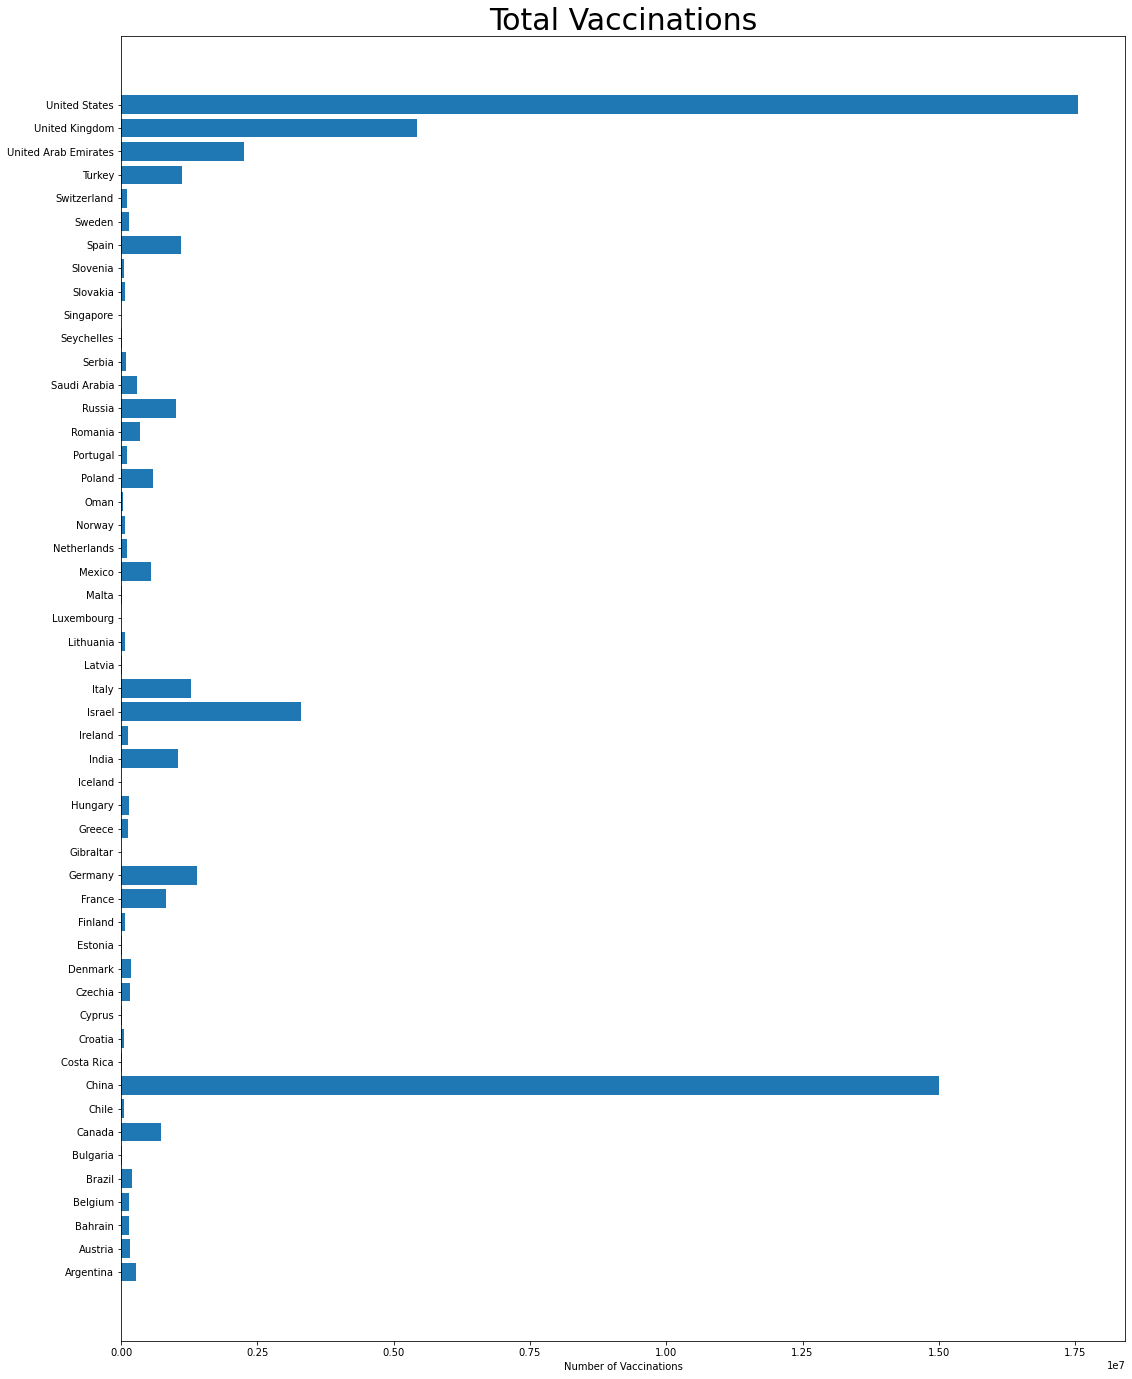

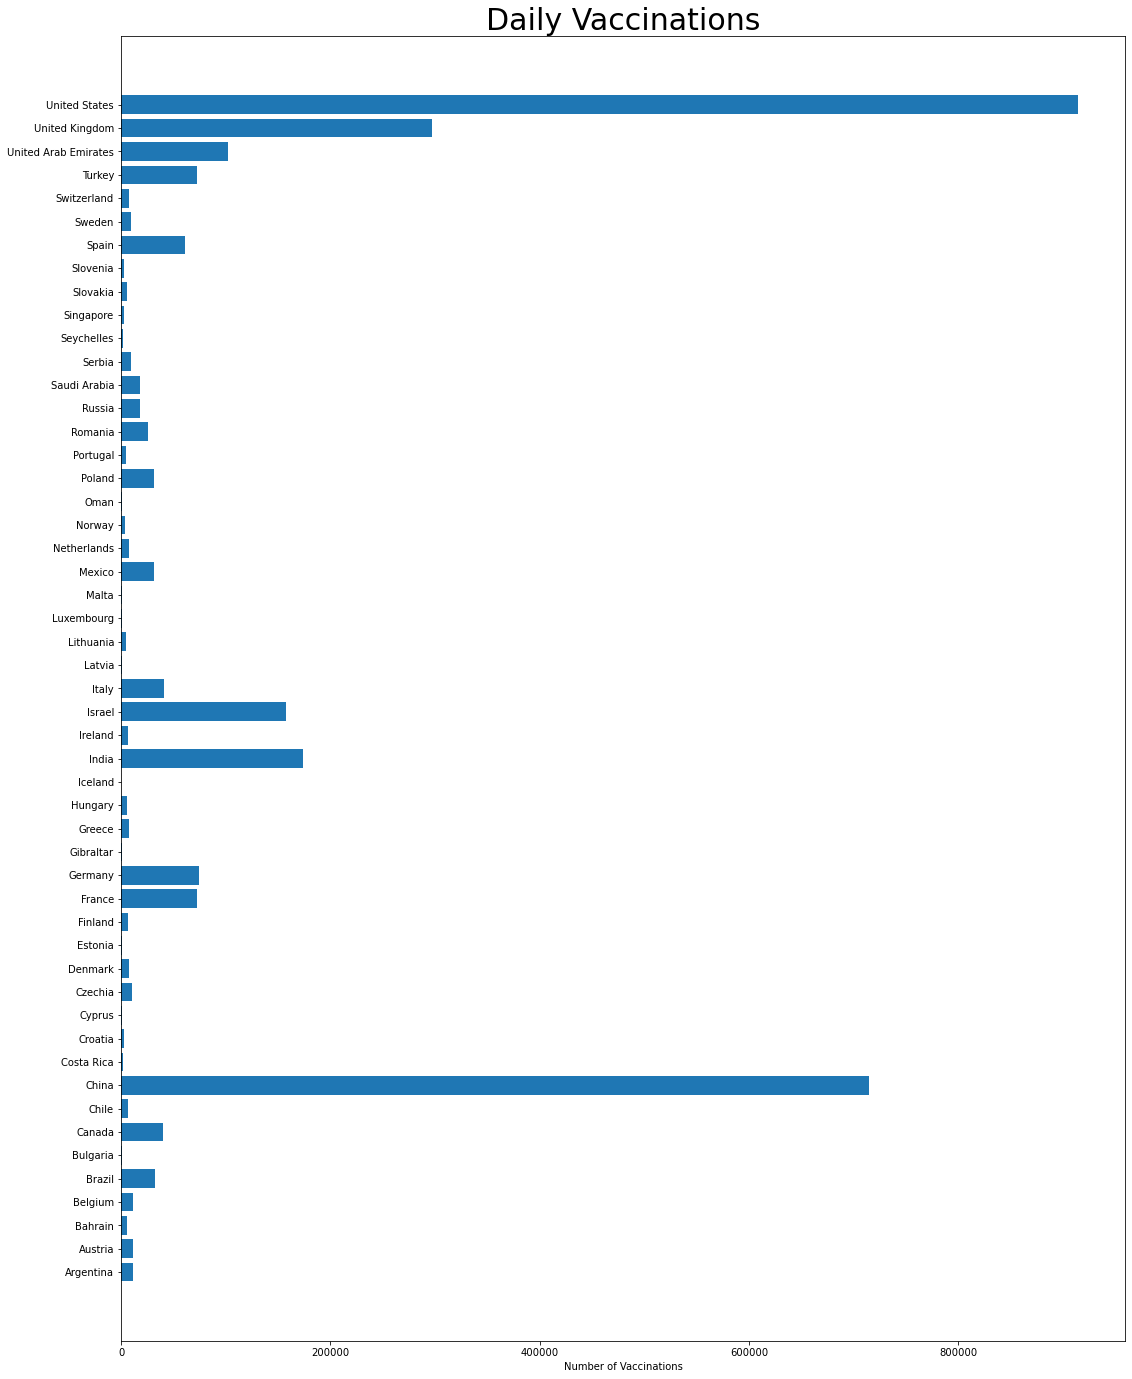

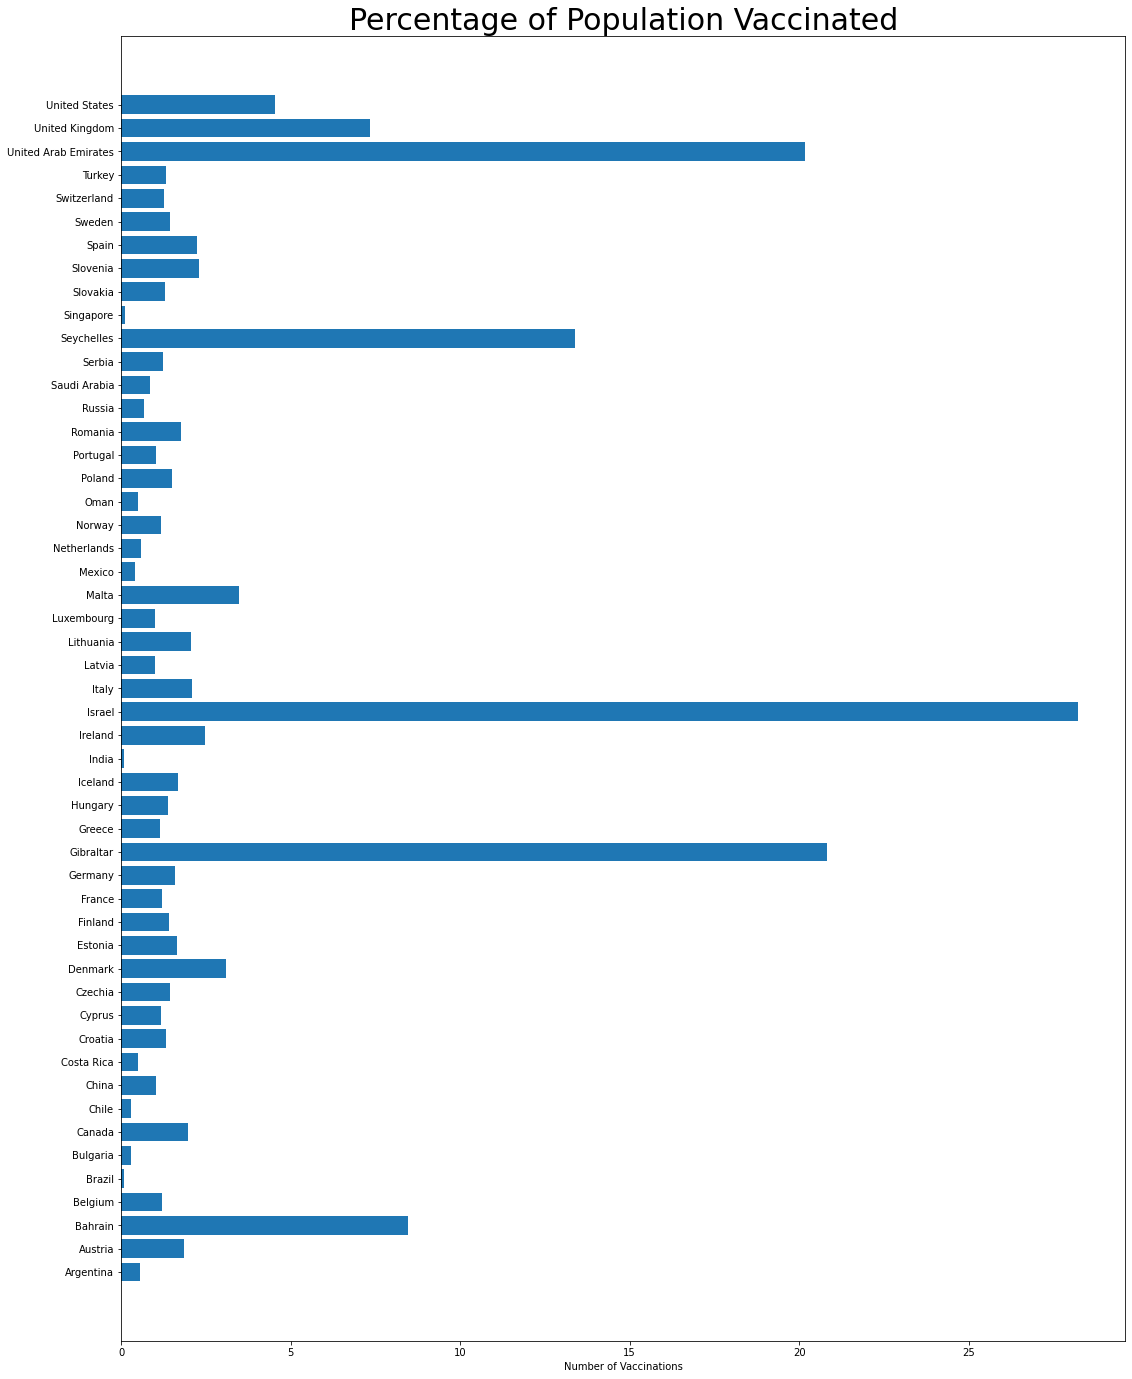

In [90]:
plot_barh(vaccine_countries, total_vaccination, 'Total Vaccinations', 'Number of Vaccinations')
plot_barh(vaccine_countries, daily_vaccination, 'Daily Vaccinations', 'Number of Vaccinations')
plot_barh(vaccine_countries, people_vaccinated_per_hundred, 'Percentage of Population Vaccinated', 'Number of Vaccinations')

In [112]:
# Extract vaccine data 
vaccine_list = recent_data['Vaccine'].unique()
country_count = []
for v in vaccine_list:
    country_count.append(recent_data[recent_data['Vaccine'] == v]['Country'].count())
vaccine_data = pd.DataFrame({'Vaccine': vaccine_list, 'Countries': country_count})

In [116]:
# Most popular vaccine
vaccine_data[vaccine_data['Countries'] == vaccine_data['Countries'].max()]

,Vaccine,Countries
1,Pfizer/BioNTech,32


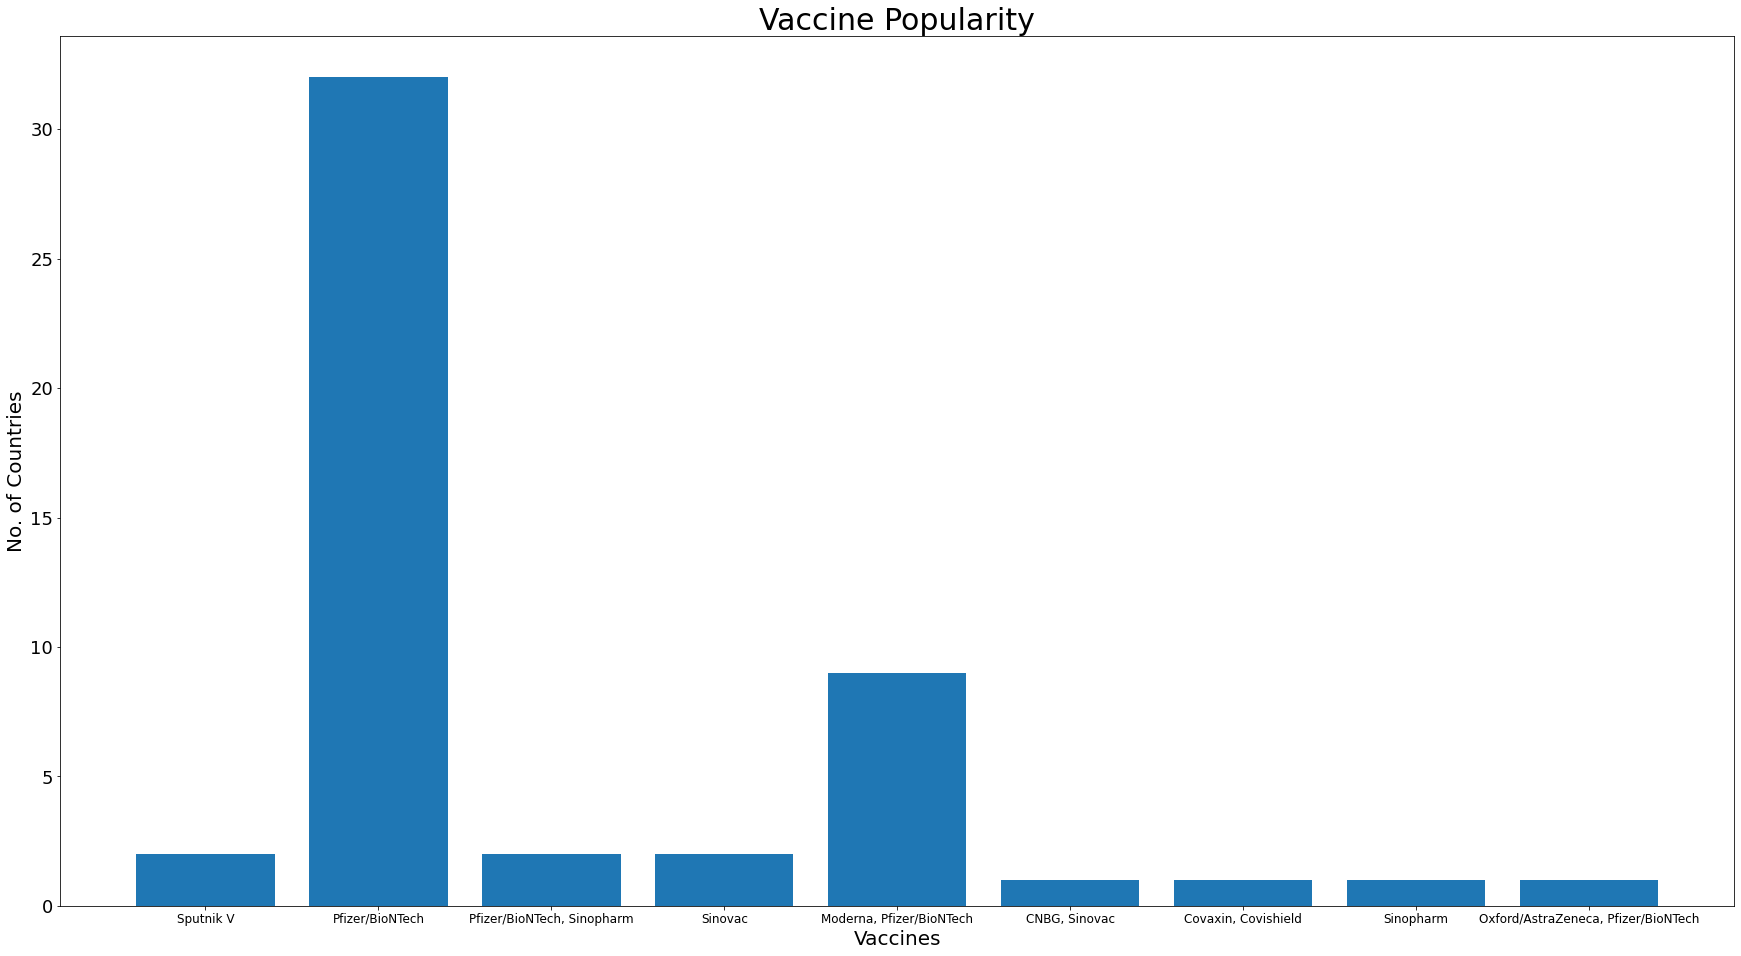

In [111]:

plot_bar(vaccine_data['Vaccine'], vaccine_data['Countries'], 'Vaccine Popularity', 'Vaccines', 'No. of Countries')

In [115]:
# Country with least number of people vaccinated
recent_data[recent_data['Total Vaccinations'] == recent_data['Total Vaccinations'].min()]

,Country,Total Vaccinations,Daily Vaccinations,Vaccine,Percentage of Population (%),Last Updated
28,Luxembourg,6193.0,475.0,Pfizer/BioNTech,0.99,2021-01-20


## Vaccination Progress Analysis of India

In [68]:
india_data = data[data.country == 'India'].dropna(subset=['daily_vaccinations'])
india_data.drop(['people_fully_vaccinated','people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million','daily_vaccinations_raw','total_vaccinations_per_hundred','source_name','source_website'], axis=1)

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,vaccines
540,India,IND,2021-01-16,191181.0,191181.0,191181.0,0.01,"Covaxin, Covishield"
541,India,IND,2021-01-17,224301.0,224301.0,112150.0,0.02,"Covaxin, Covishield"
542,India,IND,2021-01-18,454049.0,454049.0,151350.0,0.03,"Covaxin, Covishield"
543,India,IND,2021-01-19,674835.0,674835.0,168709.0,0.05,"Covaxin, Covishield"
544,India,IND,2021-01-20,806484.0,806484.0,161297.0,0.06,"Covaxin, Covishield"
545,India,IND,2021-01-21,1043534.0,1043534.0,173922.0,0.08,"Covaxin, Covishield"


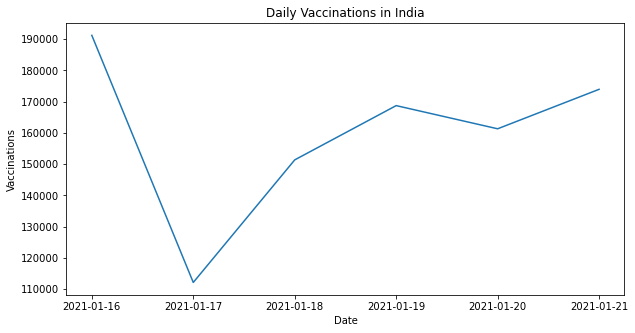

In [93]:
plot_simple(india_data['date'], india_data['daily_vaccinations'], 'Daily Vaccinations in India', 'Date', 'Vaccinations', )

# Conclusion

- **USA** and **China** has more advanced vaccination programmes leading to a higher number of vaccinations per day.
- **USA** and **China** has the highest number of people vaccinated.
- **Luxembourg** is the country with least number of people vaccinated.
- **Israel** has highest percentage of population that got vaccinated.
- **Pfizer/BioNTech** is the most popular vaccine with more than **30** countries using it.